
<div class="note">
    <p style="margin-top: 0; margin-bottom: 0;">
        <img style="margin-top: 0; margin-bottom: 0; height: 2em;" class="inline-block mr-2 no-fancybox"
            src="https://upload.wikimedia.org/wikipedia/commons/3/38/Jupyter_logo.svg" alt="">
        This page is based on a Jupyter notebook.
<a href="./SimplePETSc.ipynb" download="SimplePETSc.ipynb"><img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" src="https://img.shields.io/static/v1?label=Download:&message=SimplePETSc.ipynb&color=blue" /></a>
<a href="https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/Notebooks/SimplePETSc.py"><img src="https://img.shields.io/static/v1?label=Source:&message=SimplePETSc.py&color=brightgreen" class="no-fancybox"
        style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" /></a>
<a href="https://binder.opengeosys.org/v2/gh/bilke/binder-ogs-requirements/master?urlpath=git-pull%3Frepo=https://gitlab.opengeosys.org/ogs/ogs%26urlpath=lab/tree/ogs/Tests/Data/Notebooks/SimplePETSc.py%26branch=master%26depth=1">
    <img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;"
        src="https://img.shields.io/static/v1?label=&message=Launch notebook&color=5c5c5c&logo=" />
</a></p></div>

The following shows running a simple steady-state diffusion benchmark running on 2 cores.

In [1]:
import os
from datetime import datetime
from pathlib import Path
from subprocess import run

import matplotlib.pyplot as plt
import vtuIO

In [2]:
prj_name = "square_1e1_neumann"
data_dir = os.environ.get("OGS_DATA_DIR", "../../../Data")
prj_file = f"{data_dir}/EllipticPETSc/{prj_name}.prj"

In [3]:
out_dir = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out"))
if not out_dir.exists():
    out_dir.mkdir(parents=True)

print(f"mpirun --bind-to none -np 2 ogs {prj_file} > out.txt")
run(f"mpirun --bind-to none -np 2 ogs {prj_file} > out.txt", shell=True, check=True)

print(datetime.now())

mpirun --bind-to none -np 2 ogs /var/lib/gitlab-runner/builds/vZ6vnZiU/1/ogs/ogs/Tests/Data/EllipticPETSc/square_1e1_neumann.prj > out.txt


2024-12-20 13:06:15.480236


In [4]:
pvdfile = vtuIO.PVDIO(f"{prj_name}.pvd", dim=2)
time = pvdfile.timesteps
points = {"pt0": (0.3, 0.5, 0.0), "pt1": (0.24, 0.21, 0.0)}
pressure_linear = pvdfile.read_time_series("pressure", points)

Text(0, 0.5, 'p')

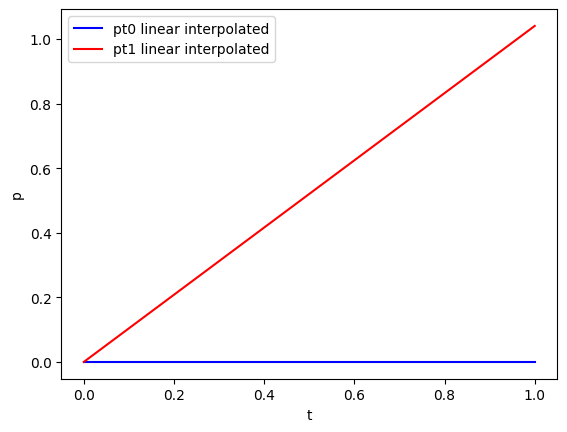

In [5]:
plt.plot(time, pressure_linear["pt0"], "b-", label="pt0 linear interpolated")
plt.plot(time, pressure_linear["pt1"], "r-", label="pt1 linear interpolated")
plt.legend()
plt.xlabel("t")
plt.ylabel("p")